# Selecionando parâmetros para o KNN

Neste notebook selecionaremos o melhor valor de K para o algoritmo de seleção KNN

### Importar as bibliotecas

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Carregar os dados 

In [2]:
# Dados de treinameto
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
training_mode = pd.read_csv("data/training_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
training_no_na = pd.read_csv("data/training_no_na.csv").set_index('sessionNo') # Missing values removidos

# Dados de teste
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
testing_mode = pd.read_csv("data/testing_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
testing_no_na = pd.read_csv("data/testing_no_na.csv").set_index('sessionNo') # Missing values removidos

### Treinar o moledo knn

In [3]:
x_train = training_mean.iloc[:, :-1]
y_train = training_mean['order']
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=7, n_neighbors=3, p=2,
           weights='uniform')

### Realizar a classificação

In [4]:
x_test = testing_mean.iloc[:, :-1]
y_test = testing_mean['order']
pred = knn.predict(x_test)

In [6]:
print(accuracy_score(y_test, pred))

0.91602


In [69]:
data_test['availability'] = data_test['availability'].map({'completely orderable': 1, 'completely not orderable': 2,'mainly orderable': 3, 'mixed': 4,'completely not determinable': 5, 'mainly not orderable': 6, 'mainly not determinable': 7})

In [105]:
score = neigh.predict(data_test.values)

In [72]:
from sklearn import metrics

In [77]:
prediction_test = pd.read_csv('realclass_t1.csv', sep="|")

In [106]:
fpr, tpr, thresholds = metrics.roc_curve(prediction_test['prediction'],score)

In [107]:
fpr

array([0.        , 0.20961953, 1.        ])

In [108]:
tpr

array([0.        , 0.33849462, 1.        ])

In [109]:
thresholds

array([2., 1., 0.])

In [83]:
import matplotlib.pyplot as plt

In [110]:
auc = metrics.auc(fpr,tpr)

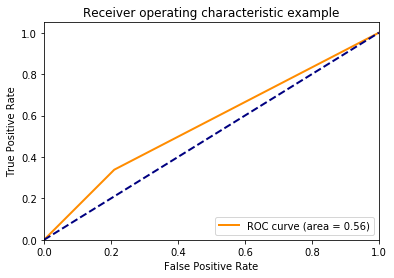

In [111]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [115]:
clf.fit(data_train.values[:,:-1],data_train.values[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [116]:
score2 = clf.predict(data_test.values)

In [117]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(prediction_test['prediction'],score2)

In [118]:
auc1 = metrics.auc(fpr1,tpr1)

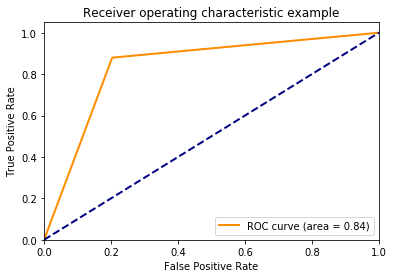

In [119]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)

In [122]:
clf1.fit(data_train.values[:,:-1],data_train.values[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [123]:
score3 = clf1.predict(data_test.values)

In [124]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(prediction_test['prediction'],score3)

In [125]:
auc2 = metrics.auc(fpr2,tpr2)

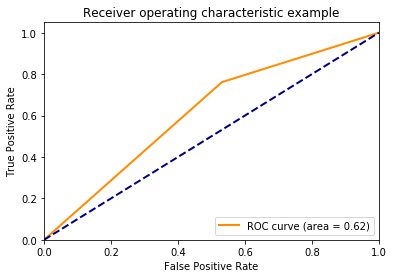

In [126]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()